In [1]:
import sys, pickle

import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('../data/DarkData/BAHAMAS/bahamas_0.1.pkl', 'rb') as file:
    labels, images = pickle.load(file)

images.shape

(3600, 3, 100, 100)

In [3]:
def plot_images(images, picked_idx, plot_title='Sample images from dataset'):
    nb_channels = images.shape[1]

    fig, axes = plt.subplots(images.shape[0], nb_channels, figsize=(12, 3*images.shape[0]), sharex=True, sharey=True)
    fig.suptitle(plot_title, fontsize=14)

    for i, img in enumerate(images):
        axes[i, 0].set_ylabel(f'Image index: {picked_idx[i]}')

        for j, channel in enumerate(img):
            axes[i, j].imshow(channel)
            axes[i, j].set_yticks([])
            axes[i, j].set_xticks([])
        
    if nb_channels == 3:
        axes[-1, 0].set_xlabel('Total mass')
        axes[-1, 1].set_xlabel('X-Ray')
        axes[-1, 2].set_xlabel('Stellar mass')
    elif nb_channels == 4:
        axes[-1, 0].set_xlabel('Total mass')
        axes[-1, 1].set_xlabel('Dark matter')
        axes[-1, 2].set_xlabel('X-Ray')
        axes[-1, 3].set_xlabel('Stellar mass')

    fig.tight_layout()
    
    return fig

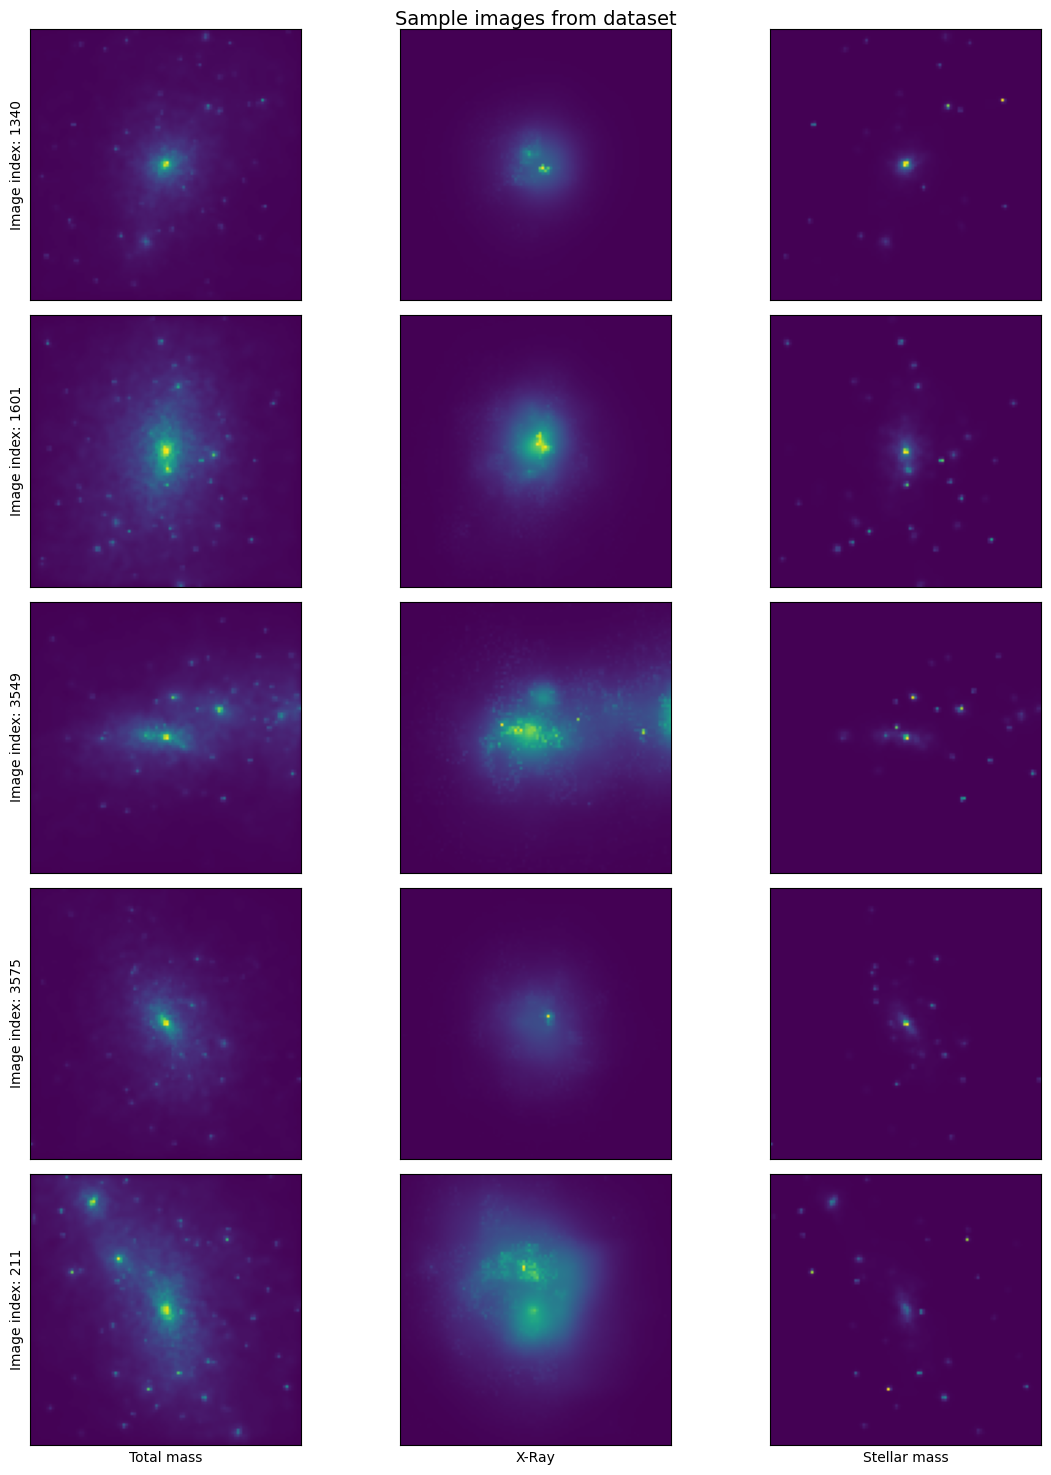

In [4]:
np.random.seed(42)
picked_images = np.random.choice(images.shape[0], size=5, replace=False)

fig = plot_images(images[picked_images], picked_images)
fig.savefig('../figures/original_images.png', dpi=300)
plt.show()

(5, 3, 512, 512)


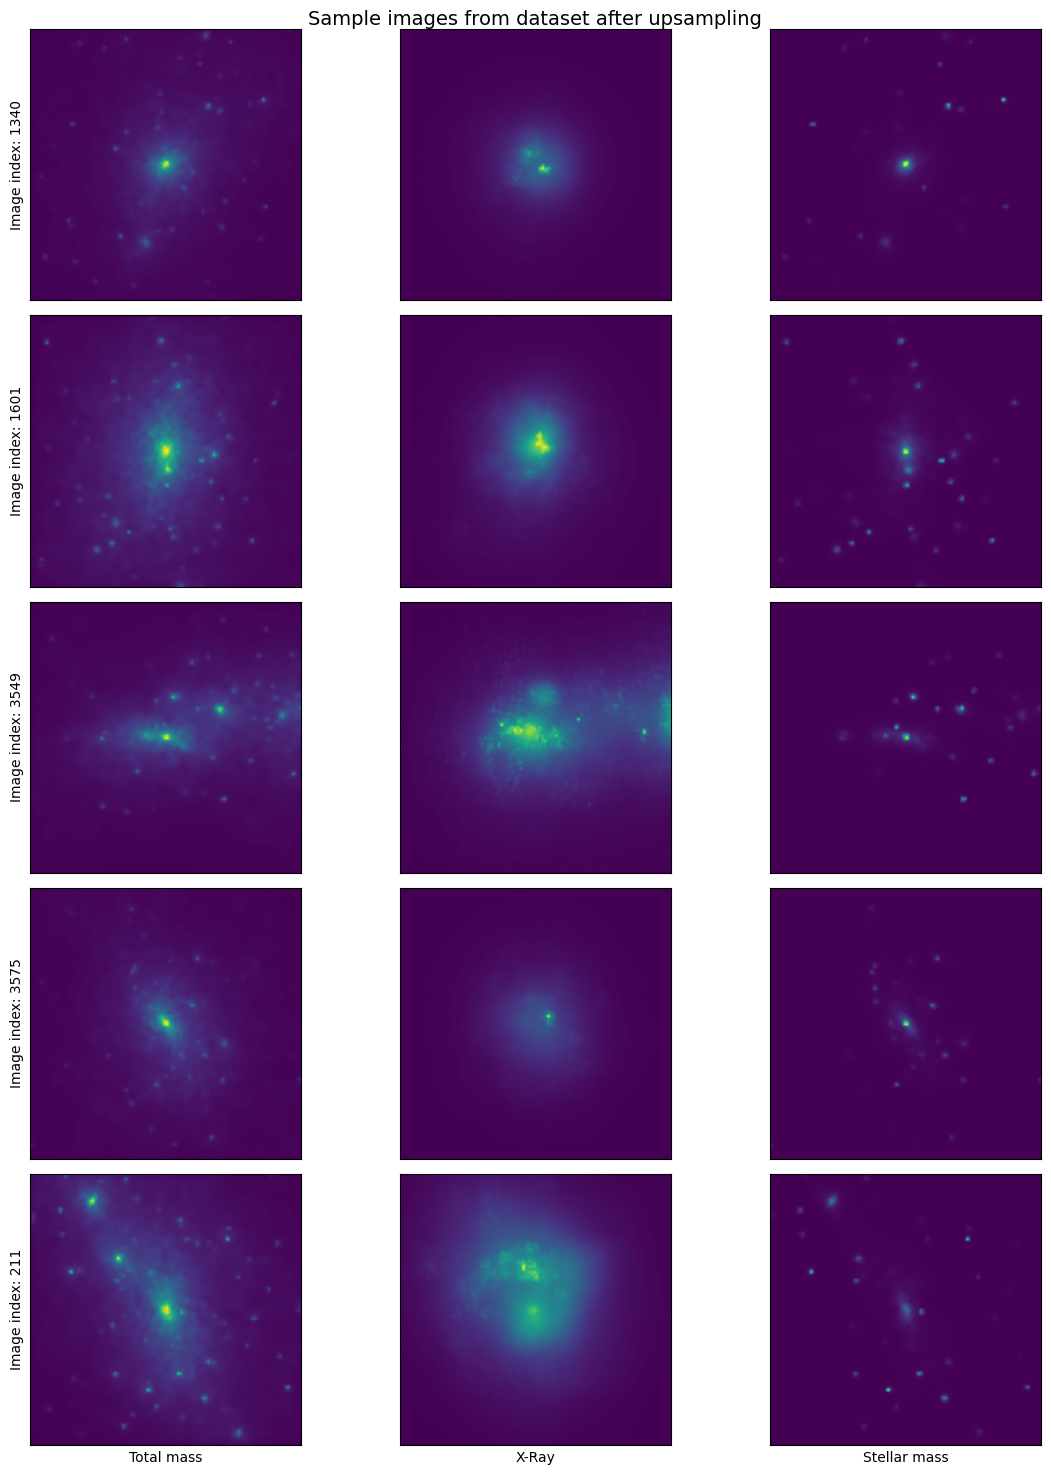

In [5]:
upsampler = torch.nn.Upsample(scale_factor=5.12, mode='bilinear', align_corners=True)
upsampled_images = upsampler(torch.tensor(images[picked_images], dtype=torch.float32)).numpy()

print(upsampled_images.shape)

fig = plot_images(upsampled_images, picked_images, 'Sample images from dataset after upsampling')
fig.savefig('../figures/upsampled_images.png', dpi=300)
plt.show()